# BMI Prediction
## Simple Linear Regression
In This Program we will predic BMI with testing data to find best data that fit simple linear regression

### Importing Needed Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Downloading Data

In [ ]:
!wget -O bmi.csv https://www.kaggle.com/datasets/yasserh/bmidataset/download?datasetVersionNumber=1

### Reading The Data in

In [11]:
df = pd.read_csv("bmi.csv")

# Take a loot at dataset
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


### Data Exploration

In [4]:
# summarize the data
df.describe()

,"""SO2 mg/cm""","""Temp F""","""Manufacturing Plants""","""1970 Pop""","""Wind mph""","""Precip inches""","""Precip days"""
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,30.048780,55.763415,463.097561,608.609756,9.443902,36.769024,113.902439
std,23.472272,7.227716,563.473948,579.113023,1.428644,11.771550,26.506419
min,8.000000,43.500000,35.000000,71.000000,6.000000,7.050000,36.000000
25%,13.000000,50.600000,181.000000,299.000000,8.700000,30.960000,103.000000
50%,26.000000,54.600000,347.000000,515.000000,9.300000,38.740000,115.000000
75%,35.000000,59.300000,462.000000,717.000000,10.600000,43.110000,128.000000
max,110.000000,75.500000,3344.000000,3369.000000,12.700000,59.800000,166.000000


Now I want to calculate bmi for all values based on given weight and height. So now let's do this. 
BMI formula = weight / (height / 100) ** 2.

In [13]:
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

So take a look at dataset again. As you can see we have a new column named BMI which calculated a little bit before in this lab. After that let's describe the dataset to see the changes that have been applied after adding BMI column.

In [16]:
df.head()

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.708284
1,Male,189,87,2,24.355421
2,Female,185,110,4,32.140248
3,Female,195,104,3,27.350427
4,Male,149,61,3,27.476240


In [17]:
df.describe()

,Height,Weight,Index,BMI
count,500.000000,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000,37.765284
std,16.375261,32.382607,1.355053,13.965620
min,140.000000,50.000000,0.000000,12.753801
25%,156.000000,80.000000,3.000000,27.169353
50%,170.500000,106.000000,4.000000,36.956941
75%,184.000000,136.000000,5.000000,46.390467
max,199.000000,160.000000,5.000000,78.853402


Let's select some features to explore more.

In [18]:
cdf = df[['Height','Weight','BMI']]
cdf.head(9)

,Height,Weight,BMI
0,174,96,31.708284
1,189,87,24.355421
2,185,110,32.140248
3,195,104,27.350427
4,149,61,27.476240
5,189,104,29.114526
6,147,92,42.574853
7,154,111,46.803846
8,174,90,29.726516


Now we can plot each of these features:

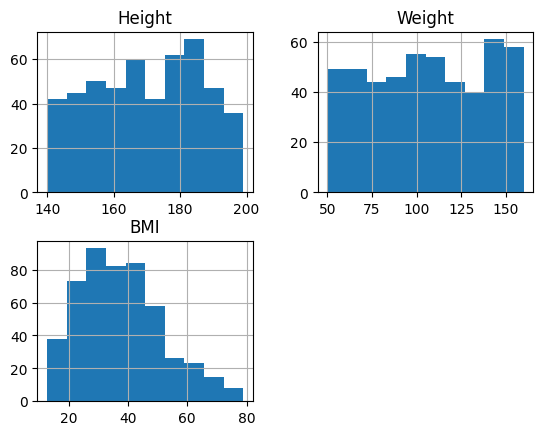

In [20]:
viz = cdf[['Height','Weight','BMI']]
viz.hist()
plt.show()

Now, let's plot each of these features against the BMI, to see how linear their relationship is:


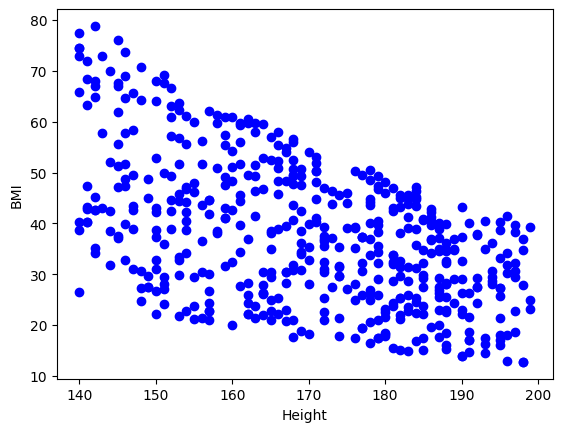

In [21]:
plt.scatter(cdf.Height, cdf.BMI, color='blue')
plt.xlabel("Height")
plt.ylabel("BMI")
plt.show()

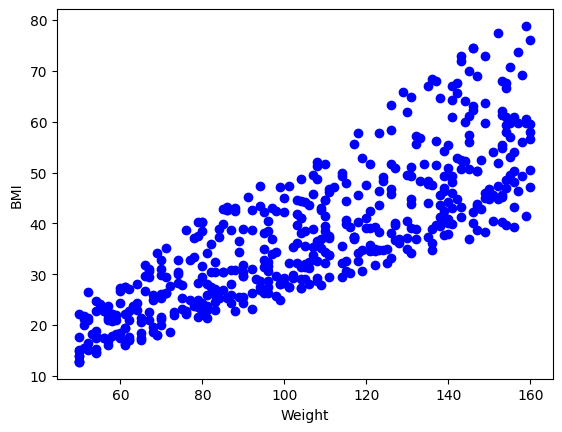

In [22]:
plt.scatter(cdf.Weight, cdf.BMI, color='blue')
plt.xlabel("Weight")
plt.ylabel("BMI")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [23]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

#### Train/Test data distribution

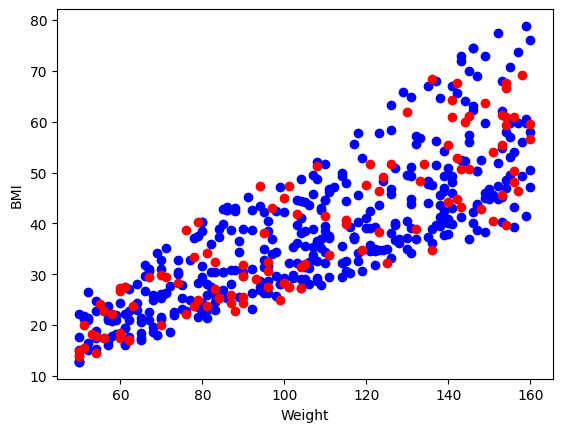

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.Weight, train.BMI, color='blue')
ax1.scatter(test.Weight, test.BMI, color='red')
plt.xlabel("Weight")
plt.ylabel("BMI")
plt.show()

#### Modeling
Using sklearn package to model data.

In [26]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Weight']])
train_y = np.asanyarray(train[['BMI']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.34895586]]
Intercept:  [0.68891234]


As mentioned before, *Coefficient* and *Intercept* in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

#### Plot outputs

We can plot the fit line over the data:

Text(0, 0.5, 'BMI')

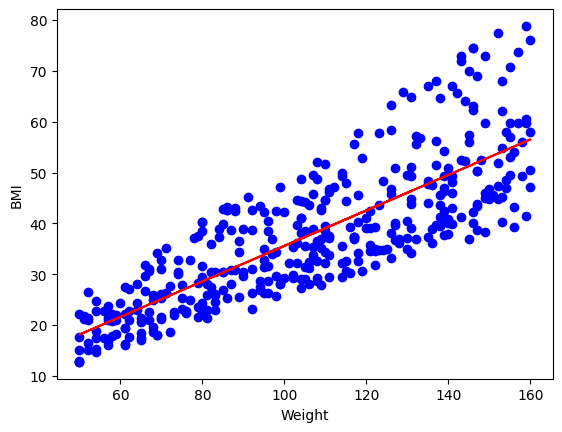

In [27]:
plt.scatter(train.Weight, train.BMI, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Weight")
plt.ylabel("BMI")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*    Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*    Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*    Root Mean Squared Error (RMSE).

*    R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).



In [28]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Weight']])
test_y = np.asanyarray(test[['BMI']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 6.23
Residual sum of squares (MSE): 55.59
R2-score: 0.76
